# Recursion

## Exercise One. Cumulative sum

**1. Recursion method with slicing**

In [32]:
def sum_array(array):
    # Base Case
    if len(array) == 1:
        return array[0]
    
    return array[0] + sum_array(array[1:])

arr = [1, 2, 3, 4]
print(sum_array(arr))

10


**2. Recursion method with index**

In [33]:
def sum_array_index(array, index):
    # Base Cases
    if len(array) - 1 == index:
        return array[index]
    
    return array[index] + sum_array_index(array, index + 1)

arr = [1, 2, 3, 4]
print(sum_array_index(arr, 0))

10


**3. Compare the Time Complexity Above**

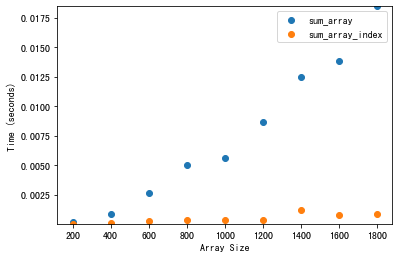

In [35]:
import matplotlib.pyplot as plt
import statistics
import time

n_steps = 10
step_size = 200
array_sizes = list(range(step_size, n_steps*step_size, step_size))
big_array = list(range(n_steps*step_size))
sum_array_times = []
sum_array_index_times = []

for array_size in array_sizes:
    subset_array = big_array[:array_size]
    
    start_time = time.time()
    sum_array(subset_array)
    sum_array_times.append(time.time() - start_time)
    
    start_time = time.time()
    sum_array_index(subset_array, 0)
    sum_array_index_times.append(time.time() - start_time)
    
    
plt.scatter(x=array_sizes, y=sum_array_times, label='sum_array')
plt.scatter(x=array_sizes, y=sum_array_index_times, label='sum_array_index')
plt.ylim(
    top=max(sum_array_times + sum_array_index_times),
    bottom=min(sum_array_times + sum_array_index_times))
plt.legend()
plt.xlabel('Array Size')
plt.ylabel('Time (seconds)')
plt.plot();

**4. Iterative method with loops**

In pursuit to use recursion we may actually made things worse. As below is an iterative solution to this problem:

In [36]:
def sum_array_iter(array):
    result = 0
    
    for x in array:
        result += x
    
    return result

arr = [1, 2, 3, 4]
print(sum_array_iter(arr))

10


The `sum_array_iter` function is a lot more straightforward than the two recursive functions, which is important. Second, to help ensure an answer that is correct and bug free, you generally want to pick the solution that is more readable. In some cases recursion is more readable and in some cases iteration is more readable. As you gain experience reading other people’s code, you’ll get an intuition for code readability.

## Exercise Two: Reverse a string

**1. Recursion method**

(1) **Linear** Time Complexity

In [11]:
def reverse_string_index(string, index):
    if -len(string) == index:
        return string[index]
    return string[index] + reverse_string(string, index - 1)

In [29]:
# test
print("Pass" if reverse_string_index("hello", -1) == "olleh" else "Fail")
print("Pass" if reverse_string_index("good", -1) == "doog" else "Fail")

Pass
Pass


(2) **Polynomial** Time Complexity O($k*n$) where k is the number of elements to copy

In [31]:
def reverse_string_slice(string):
    if len(string) == 1:
        return string[-1]
    return string[-1] + reverse_string_slice(string[: -1])

In [28]:
# test
print("Pass" if reverse_string_slice("hello") == "olleh" else "Fail")
print("Pass" if reverse_string_slice("good") == "doog" else "Fail")

Pass
Pass


## Exercise Three: Palindrome Checking

A **palindrome** is a word that is the reverse of itself—that is, it is the same word when read forwards and backwards.

For example:
*  "madam" is a palindrome
* "abba" is a palindrome
*  "cat" is not
*  "a" is a trivial case of a palindrome

<font color='red'>**Use a recursion way**</font>

In [43]:
def is_palindrome(input):
    """
    Return True if input is palindrome, False otherwise.

    Args:
       input(str): input to be checked if it is palindrome
    """
    
    # Termination / Base condition
    if len(input) <= 1:
        return True
    else:
        first_char = input[0]
        last_char = input[-1]

        # sub_input is input with first and last char removed
        sub_input = input[1:-1]

        # recursive call, if first and last char are identical, else return False
        return (first_char == last_char) and is_palindrome(sub_input)


In [44]:
# test
print ("Pass" if  (is_palindrome("")) else "Fail")
print ("Pass" if  (is_palindrome("a")) else "Fail")
print ("Pass" if  (is_palindrome("madam")) else "Fail")
print ("Pass" if  (is_palindrome("abba")) else "Fail")
print ("Pass" if not (is_palindrome("Udacity")) else "Fail")

Pass
Pass
Pass
Pass
Pass


## Exercise Four. Add One

Given a non-negative number in the form of list elements. For example, the number `123` would be provided as `arr = [1, 2, 3]`. Add one to the number and return the output in the form of a new list. 

**Example 1:**
* `input = [1, 2, 3]`
* `output = [1, 2, 4]`

**Example 2:**
* `input = [1, 2, 9]`
* `output = [1, 3, 0]`

**Example 3:**
* `input = [9, 9, 9]`
* `output = [1, 0, 0, 0]`

<font color='red'>**Use RECURSIVE function definition here**</font>

In [56]:
def add_one(arr):
    if arr == [9]:
        return [1, 0]
    elif arr[-1] < 9:
        arr[-1] += 1
    else:
        arr = add_one(arr[:-1]) + [0]
        
    return arr

In [63]:
# A helper function for Test Cases
def test_function(test_case):
    arr = test_case[0]
    solution = test_case[1]
    
    output = add_one(arr)
    for index, element in enumerate(output):
        if element != solution[index]:
            print("Test Failed!")
            return
    print("Test Successed...")  

In [64]:
# Test Case 1
arr = [0]
solution = [1]
test_case = [arr, solution]
test_function(test_case)

# Test Case 2
arr = [1, 2, 3]
solution = [1, 2, 4]
test_case = [arr, solution]
test_function(test_case)

# Test Case 3
arr = [9, 9, 9]
solution = [1, 0, 0, 0]
test_case = [arr, solution]
test_function(test_case)

Test Successed...
Test Successed...
Test Successed...
